__Ejercicio 1:__ Resolver con Runge-Kutta orden 4 el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}
* Grafiquen muchas trayectorias en el espacio de fase, utilizando condiciones iniciales aleatorias.
* Calculen el Jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$ y evaluenlo en $\vec 0$, el cual es un punto fijo. Calculen $\Delta$ y $\tau$ e indiquen que tipo de punto fijo es el $\vec 0$.

In [14]:
function MetodoRunge1(f,g,t0,h,N) #función para la aproximación mediante el método runge de cuarto grado
    T = []
    X1 = []
    X2=[]
    Y1 = []
    Y2=[]
    t = t0 #es el t inicial
    x1 = rand(1:10) #es el x1 inicial
    x2 = rand(1:10) #es el x2 inicial
    println("Condiciones iniciales: ",x1,"  y   ", x2)
    y1 = (x2)-(x2^3) #calculo y1 inicial
    y2=(-x1)-(x2^2) #calculo y2 inicial
    while t<=N
        push!(T,t)
        push!(X1,x1)
        push!(X2,x2)
        push!(Y1,y1)
        push!(Y2,y2)
        #se necsita calcular dos grupos de k para calcular cada x1 y x2
        k1=(f(t,x1,x2)) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=(f(t+(h/2),x1+(h*k1/2),x2+(h*k1/2)))#runge de 4 grado.
        k3=f(t+(h/2),x1+(h*k2/2),x2+(h*k2/2))
        k4=f(t+h,x1+(h*k3),x2+(h*k3))
        K1=(g(t,x1,x2)) #K1,k2,k3,k4 son las fórmulas para calcular las segundas constantes para el método
        K2=(g(t+(h/2),x1+(h*K1/2),x2+(h*K1/2)))#runge de 4 grado.
        K3=g(t+(h/2),x1+(h*K2/2),x2+(h*K2/2))
        K4=g(t+h,x1+(h*K3),x2+(h*K3))
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x1= x1 + (h/6)*(k1+(2(k2+k3))+k4)
        x2= x2 + (h/6)*(K1+(2(K2+K3))+K4)#Es según la fórmula, una aproximación del método de runge
        y1=f(t,x1,x2) #donde g es la funcion de velocidad para graficar el espacio fase.
        y2=g(t,x1,x2)
    end
    plot(X1,Y1,color="brown") #grafico x1 vs y1 estado fase
    plot(X2,Y2,color="purple") #grafico x1 vs y1 estado fase
end

MetodoRunge1 (generic function with 3 methods)

In [10]:
function f1(t,x1,x2)
    xpr1=(x2)-(x2^3)
    return (xpr1)
end

f1 (generic function with 2 methods)

In [11]:
function g1(t,x1,x2)
    xpr1=(-x1)-(x2^2)
    return (xpr1)
end

g1 (generic function with 1 method)

In [5]:
using PyPlot

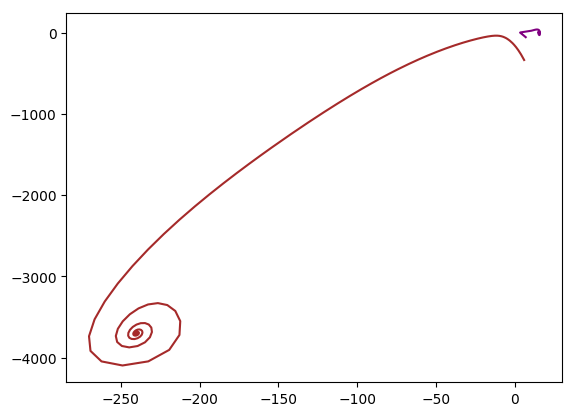

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f47e961ae90>

In [12]:
MetodoRunge1(f1,g1,0,0.01,10)

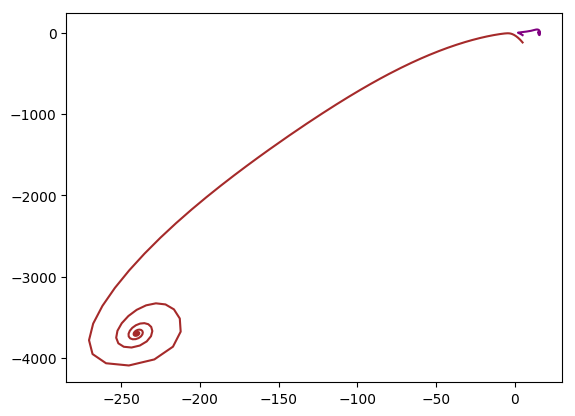

Condiciones iniciales: 5  y   5


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f47c20b4450>

In [15]:
MetodoRunge1(f1,g1,0,0.01,10)

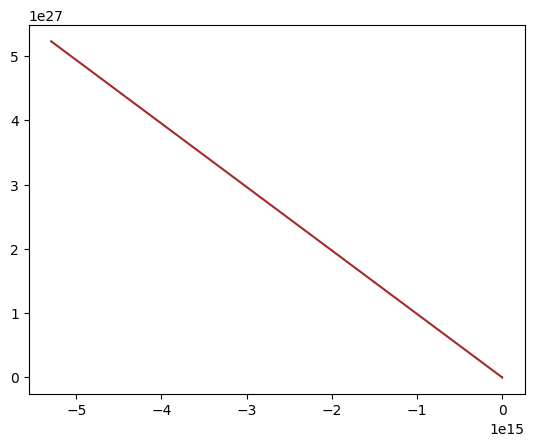

Condiciones iniciales: 8  y   3


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f47c1ff4210>

In [16]:
MetodoRunge1(f1,g1,0,0.01,10)

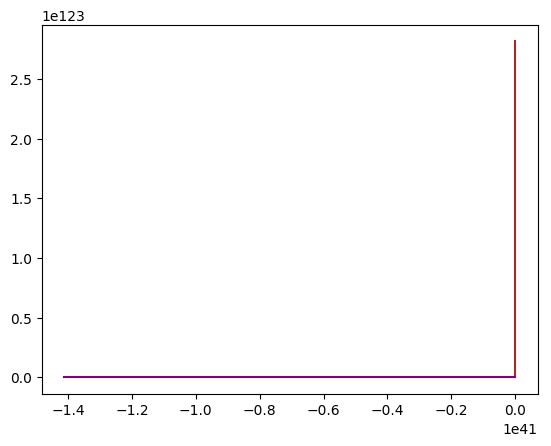

Condiciones iniciales: 6  y   4


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f47c1f34090>

In [17]:
MetodoRunge1(f1,g1,0,0.01,10)

In [31]:
function Jacobiano1(x,y)
println("El Jacobiano de la función es")
A=zeros(2,2)
A[1,1]=0
A[1,2]=1-3(y^2)
A[2,1]=-1
A[2,2]=-2y
println(A)
    D=det(A)
    println("El determinante del JAcobiano es: ",D)
    T=A[1,1]+A[2,2]
    println("La traza del JAcobiano es: ",T)
    alfa=(T^2)-(4*D)
    if alfa<0
        println("Es un nodo estable")
    end
    if alfa>0
        println("Es un nodo inestable")
    end
end

Jacobiano1 (generic function with 1 method)

In [32]:
Jacobiano1(0,0)


El Jacobiano de la función es
[0.0 1.0; -1.0 0.0]
El determinante del JAcobiano es: 1.0
La traza del JAcobiano es: 0.0
Es un nodo estable


__Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
* Usen $\mu=0.5$.
* Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

In [55]:
function MetodoRunge2(f,g,t0,h,N) #función para la aproximación mediante el método runge de cuarto grado
    T = []
    X1 = []
    X2=[]
    t = t0 #es el t inicial
    x1 = rand(1:10) #es el x1 inicial
    x2 = rand(1:10) #es el x2 inicial
    println("Condiciones iniciales: ",x1,"  y   ", x2)
    while t<=N
        push!(T,t)
        push!(X1,x1)
        push!(X2,x2)
        #se necsita calcular dos grupos de k para calcular cada x1 y x2
        k1=(f(t,x1,x2)) #K1,k2,k3,k4 son las fórmulas para calcular las constantes para el método
        k2=(f(t+(h/2),x1+(h*k1/2),x2+(h*k1/2)))#runge de 4 grado.
        k3=f(t+(h/2),x1+(h*k2/2),x2+(h*k2/2))
        k4=f(t+h,x1+(h*k3),x2+(h*k3))
        K1=(g(t,x1,x2)) #K1,k2,k3,k4 son las fórmulas para calcular las segundas constantes para el método
        K2=(g(t+(h/2),x1+(h*K1/2),x2+(h*K1/2)))#runge de 4 grado.
        K3=g(t+(h/2),x1+(h*K2/2),x2+(h*K2/2))
        K4=g(t+h,x1+(h*K3),x2+(h*K3))
        t=t+h #son los pasos de tiempo y es válido ya que son constantes.
        x1= x1 + (h/6)*(k1+(2(k2+k3))+k4)
        x2= x2 + (h/6)*(K1+(2(K2+K3))+K4)#Es según la fórmula, una aproximación del método de runge
    end
    plot(T,X1,color="brown") #grafico t vs x en cafe
    plot(T,X2,color="black") #grafico t vs y en negro
    return(T,X2)
end

MetodoRunge2 (generic function with 1 method)

In [56]:
function f2(t,x,y)
    return y
end

f2 (generic function with 2 methods)

In [57]:
function g2(t,x,y)
    a=x+(0.5*(1-(x^2))*y)
    return a
end

g2 (generic function with 2 methods)

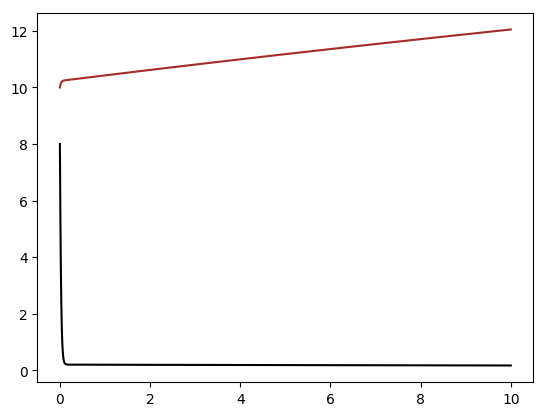

Condiciones iniciales: 10  y   8


(Any[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0],Any[8,5.59799,3.80006,2.52498,1.66347,1.10376,0.750559,0.532109,0.39878,0.318085  …  0.167386,0.167363,0.167339,0.167315,0.167291,0.167268,0.167244,0.16722,0.167197,0.167173])

In [59]:
MetodoRunge2(f2,g2,0,0.01,10) #la negra es la grafica t vs y y la café de t vs x

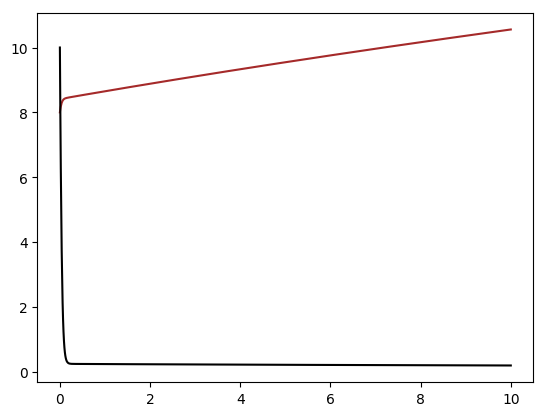

Condiciones iniciales: 8  y   10


(Any[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0],Any[10,7.98949,6.2777,4.86074,3.71954,2.82351,2.1357,1.61778,1.23386,0.952791  …  0.191577,0.191541,0.191505,0.19147,0.191434,0.191398,0.191363,0.191327,0.191292,0.191256])

In [60]:
MetodoRunge2(f2,g2,0,0.01,10) 

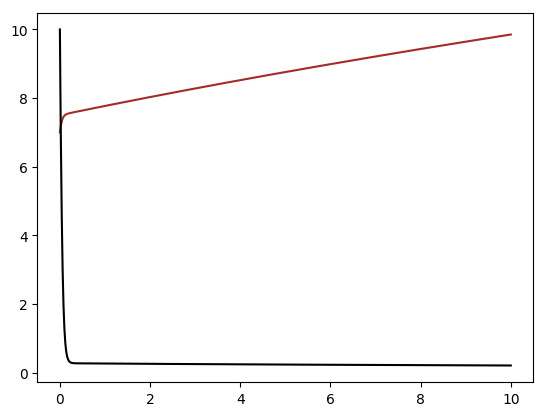

Condiciones iniciales: 7  y   10


(Any[0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  9.91,9.92,9.93,9.94,9.95,9.96,9.97,9.98,9.99,10.0],Any[10,8.39078,6.96273,5.71982,4.65827,3.76771,3.03283,2.43535,1.95586,1.57531  …  0.205609,0.205565,0.20552,0.205476,0.205432,0.205388,0.205344,0.2053,0.205256,0.205212])

In [61]:
MetodoRunge2(f2,g2,0,0.01,10) 